# Traffic Prediction using Machine Learning models

In [ ]:
#LIBRARY TO USE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

#for the models
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


## Exploratory Data Analysis

In [ ]:
#read data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Traffic.csv')
df.head()

Saving Traffic.csv to Traffic (6).csv


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


### 1 - Searching for missing values


In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


### 2- Ploting the different distribution of the target variable

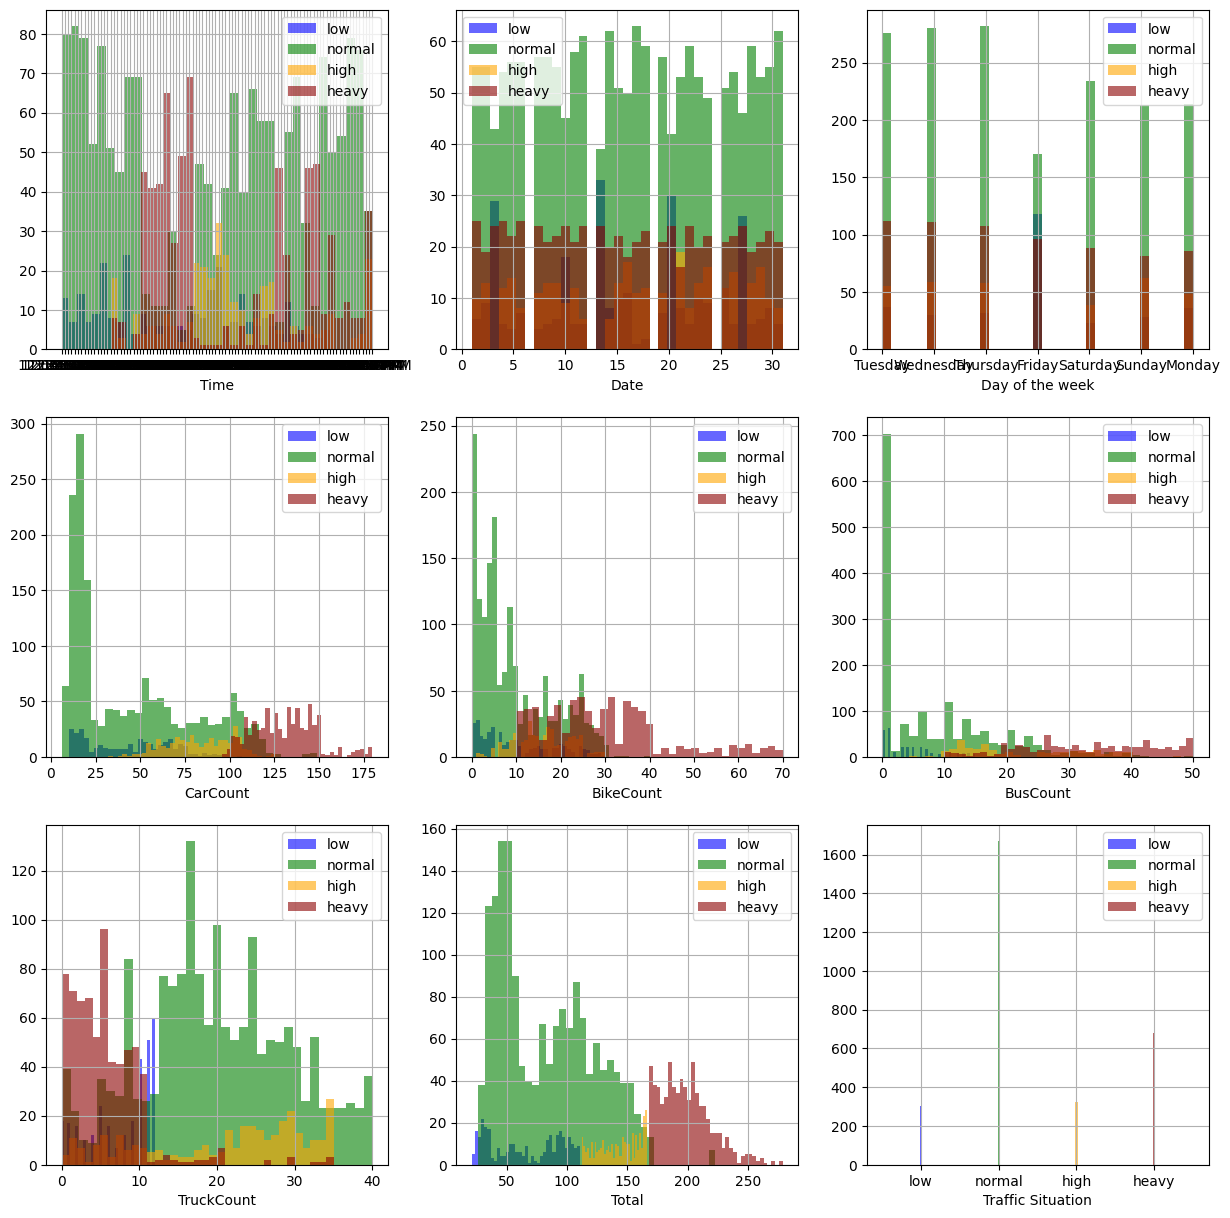

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(df, 1):
    plt.subplot(3, 3, i)
    df[df["Traffic Situation"] == "low"][column].hist(bins=35, color='blue', label='low', alpha=0.6)
    df[df["Traffic Situation"] == "normal"][column].hist(bins=35, color='green', label='normal', alpha=0.6)
    df[df["Traffic Situation"] == "high"][column].hist(bins=35, color='orange', label='high', alpha=0.6)
    df[df["Traffic Situation"] == "heavy"][column].hist(bins=35, color='darkred', label='heavy', alpha=0.6)

    plt.legend()
    plt.xlabel(column)

Formatting the values of 'Time', 'Day of the week' & 'Traffic Situation' columns

> - 'Time' : Removing the 'AM' & 'PM' in order to keep only numerical values of hours. Then convert every values in seconds
> - 'Day of the week' : in order to have numbers intead of charachers referings as days, 1 = Monday and 7 = Sunday.
> - 'Traffic Situation':  same logic, 1 = Low and 4 = Heavy .


In [ ]:
tf = {'heavy': 4, 'high': 3, 'low': 1, 'normal': 2}
df['Traffic_Situation'] = (df['Traffic Situation']).map(tf)

doftw = {'Monday' : 1 , 'Tuesday' : 2, "Wednesday" : 3, 'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6, 'Sunday' : 7}
df['Day_of_the_week'] = df['Day of the week'].map(doftw)

df.drop(['Day of the week', 'Traffic Situation'], inplace=True, axis=1)

# changer le format de la colonne time pour une meilleure analyse
df['Time'] = pd.to_datetime(df['Time']).dt.hour * 3600 + pd.to_datetime(df['Time']).dt.minute * 60


df

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation,Day_of_the_week
0,0,10,31,0,4,4,39,1,2
1,900,10,49,0,3,3,55,1,2
2,1800,10,46,0,3,6,55,1,2
3,2700,10,51,0,2,5,58,1,2
4,3600,10,57,6,15,16,94,2,2
...,...,...,...,...,...,...,...,...,...
2971,81900,9,16,3,1,36,56,2,4
2972,82800,9,11,0,1,30,42,2,4
2973,83700,9,15,4,1,25,45,2,4
2974,84600,9,16,5,0,27,48,2,4


## Feature Selection

### 1. Correlation Matrix

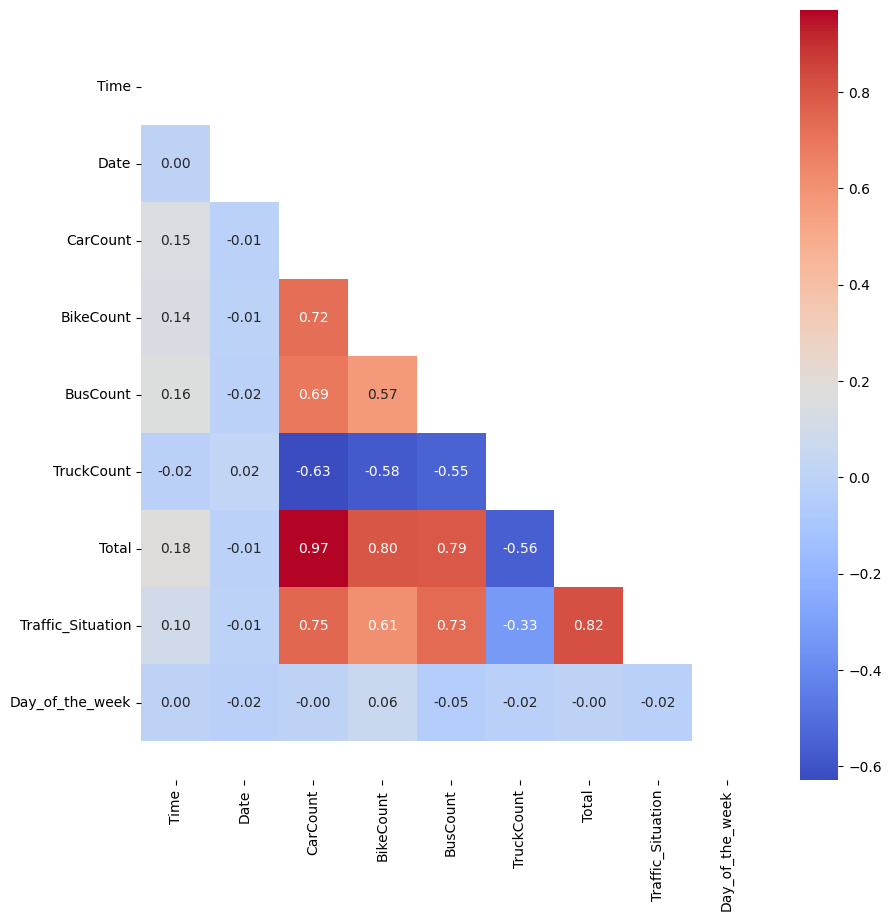

In [ ]:
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap= 'coolwarm', annot=True,fmt=".2f", mask=mask);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Split data into test and train

Standardization of necessary columns to achieve a 'normal' distribution."

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
col_to_fit = ['Time','Date','CarCount', 'BikeCount', 'BusCount', 'TruckCount']

df[col_to_fit] = scaler.fit_transform(df[col_to_fit])


In [ ]:
df

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation,Day_of_the_week
0,-1.714102,-0.670820,-0.822297,-1.161302,-0.786604,-1.068183,39,1,2
1,-1.678015,-0.670820,-0.429653,-1.161302,-0.856341,-1.162505,55,1,2
2,-1.641929,-0.670820,-0.495094,-1.161302,-0.856341,-0.879540,55,1,2
3,-1.605843,-0.670820,-0.386026,-1.161302,-0.926078,-0.973862,58,1,2
4,-1.569756,-0.670820,-0.255144,-0.694207,-0.019496,0.063673,94,2,2
...,...,...,...,...,...,...,...,...,...
2971,1.569756,-0.782624,-1.149501,-0.927754,-0.995815,1.950101,56,2,4
2972,1.605843,-0.782624,-1.258569,-1.161302,-0.995815,1.384172,42,2,4
2973,1.641929,-0.782624,-1.171315,-0.849905,-0.995815,0.912566,45,2,4
2974,1.678015,-0.782624,-1.149501,-0.772056,-1.065552,1.101208,48,2,4


Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Traffic_Situation', axis=1)
y = df['Traffic_Situation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2083, 8), (893, 8), (2083,), (893,))

## Machine learning Models Building

### I- Regression Models

> 1. Linear regression
> 2. Ridge
> 3. Lasso
> 4. Elastic Net


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV



### 1. Linear Regression


In [ ]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

#print(lr, X_train, y_train, X_test, y_test)
print('MSE (training): %.2f' % mean_squared_error(y_train, lr.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, y_pred), sep='\n')

MSE (training): 0.25
MSE (test): 0.26


### 2. Ridge

In [ ]:
alphas = 10**np.linspace(5,-2,100)*0.5

coefs = []
for a in alphas:
    ridge = RidgeCV(alphas =a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)


ridgecv = RidgeCV(alphas = alphas, cv = 10, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)

print('MSE (training): %.2f' % mean_squared_error(y_train, ridgecv.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, ridgecv.predict(X_test)), sep='\n')

MSE (training): 0.25
MSE (test): 0.26


### 3. Lasso

In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

print('Number of features used:', np.sum(lassocv.coef_ != 0))

print('MSE (training): %.2f' % mean_squared_error(y_train, lassocv.predict(X_train )),
      'MSE (test): %.2f' % mean_squared_error(y_test, lassocv.predict(X_test)), sep='\n')

Number of features used: 4
MSE (training): 0.26
MSE (test): 0.28


### 4. Elastic Net

In [ ]:
elastic_netcv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
elastic_netcv.fit(X_train, y_train)
elastic_netcv.alpha_

print('MSE (training): %.2f' % mean_squared_error(y_train, elastic_netcv.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, elastic_netcv.predict(X_test)), sep='\n')

MSE (training): 0.26
MSE (test): 0.28


### II- Classification
> 1. Logistic Regression
> 2. K-Nearest Neighbours Classifier
> 3. Bagging
> 4. Boosting
> 5. Support Vector machine
> 6. Decision Tree Classifier
> 7. Random Forest Classifier


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_df = pd.DataFrame(columns=["Model Name", "Train Accuracy", "Test Accuracy"])

def print_score(clf, X_train_scaled, y_train, X_test, y_test, model_name):
    train_accuracy = None
    test_accuracy = None

    # Predict on the training set
    pred_train = clf.predict(X_train_scaled)
    clf_report_train = pd.DataFrame(classification_report(y_train, pred_train, output_dict=True))
    train_accuracy = accuracy_score(y_train, pred_train) * 100

    # Predict on the test set
    pred_test = clf.predict(X_test)
    clf_report_test = pd.DataFrame(classification_report(y_test, pred_test, output_dict=True))
    test_accuracy = accuracy_score(y_test, pred_test) * 100

    # Create a single row for both training and testing accuracy
    accuracy_df.loc[len(accuracy_df)] = [model_name, train_accuracy, test_accuracy]

    # Print the results
    print(f"Model: {model_name} - Train Result:\n================================================")
    print(f"Accuracy Score (Train): {train_accuracy:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT (Train):\n{clf_report_train}")
    print("_______________________________________________")
    print(f"Confusion Matrix (Train):\n{confusion_matrix(y_train, pred_train)}\n")
    print(f"Model: {model_name} - Test Result:\n================================================")
    print(f"Accuracy Score (Test): {test_accuracy:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT (Test):\n{clf_report_test}")
    print("_______________________________________________")
    print(f"Confusion Matrix (Test):\n{confusion_matrix(y_test, pred_test)}\n")


### Model Building Steps :

1 - Import the respective library from scikit-learn

2 - Set the model_name so that the model score can be added to the accuracy_df

3 - Fit the model to the training data

4 - Check the performance of the model

5 - Print the model's performance scores

 We use the same pattern for all the models

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_name = "Logistic Regression"

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, model_name)



Model: Logistic Regression - Train Result:
Accuracy Score (Train): 82.48%
_______________________________________________
CLASSIFICATION REPORT (Train):
                    1            2           3           4  accuracy  \
precision    0.761062     0.805413    0.859375    0.883117  0.824772   
recall       0.407583     0.954073    0.236052    0.981443  0.824772   
f1-score     0.530864     0.873463    0.370370    0.929688  0.824772   
support    211.000000  1154.000000  233.000000  485.000000  0.824772   

             macro avg  weighted avg  
precision     0.827242      0.825049  
recall        0.644788      0.824772  
f1-score      0.676096      0.795575  
support    2083.000000   2083.000000  
_______________________________________________
Confusion Matrix (Train):
[[  86  125    0    0]
 [  27 1101    0   26]
 [   0  141   55   37]
 [   0    0    9  476]]

Model: Logistic Regression - Test Result:
Accuracy Score (Test): 82.53%
_______________________________________________
CLA

### 2. K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_name = "KNN Classifier"

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test,model_name )



Model: KNN Classifier - Train Result:
Accuracy Score (Train): 91.89%
_______________________________________________
CLASSIFICATION REPORT (Train):
                    1            2           3           4  accuracy  \
precision    0.857143     0.895582    0.925743    0.995851  0.918867   
recall       0.625592     0.966205    0.802575    0.989691  0.918867   
f1-score     0.723288     0.929554    0.859770    0.992761  0.918867   
support    211.000000  1154.000000  233.000000  485.000000  0.918867   

             macro avg  weighted avg  
precision     0.918580      0.918408  
recall        0.846016      0.918867  
f1-score      0.876343      0.915571  
support    2083.000000   2083.000000  
_______________________________________________
Confusion Matrix (Train):
[[ 132   79    0    0]
 [  22 1115   15    2]
 [   0   46  187    0]
 [   0    5    0  480]]

Model: KNN Classifier - Test Result:
Accuracy Score (Test): 85.22%
_______________________________________________
CLASSIFICATIO

### 3. Bagging

In [ ]:

model_name = "Bagging"

bagg_clf= BaggingClassifier(random_state=42)
bagg_clf.fit(X_train, y_train)

print_score(bagg_clf, X_train, y_train, X_test, y_test, model_name)


Model: Bagging - Train Result:
Accuracy Score (Train): 99.95%
_______________________________________________
CLASSIFICATION REPORT (Train):
               1            2      3           4  accuracy    macro avg  \
precision    1.0     1.000000    1.0    0.997942   0.99952     0.999486   
recall       1.0     0.999133    1.0    1.000000   0.99952     0.999783   
f1-score     1.0     0.999567    1.0    0.998970   0.99952     0.999634   
support    211.0  1154.000000  233.0  485.000000   0.99952  2083.000000   

           weighted avg  
precision      0.999521  
recall         0.999520  
f1-score       0.999520  
support     2083.000000  
_______________________________________________
Confusion Matrix (Train):
[[ 211    0    0    0]
 [   0 1153    0    1]
 [   0    0  233    0]
 [   0    0    0  485]]

Model: Bagging - Test Result:
Accuracy Score (Test): 99.55%
_______________________________________________
CLASSIFICATION REPORT (Test):
              1           2          3         

### 4. Boosting

In [ ]:

model_name = "Boosting"
boost_clf= GradientBoostingClassifier()
boost_clf.fit(X_train, y_train)

print_score(boost_clf, X_train, y_train, X_test, y_test, model_name)


Model: Boosting - Train Result:
Accuracy Score (Train): 100.00%
_______________________________________________
CLASSIFICATION REPORT (Train):
               1       2      3      4  accuracy  macro avg  weighted avg
precision    1.0     1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0     1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0     1.0    1.0    1.0       1.0        1.0           1.0
support    211.0  1154.0  233.0  485.0       1.0     2083.0        2083.0
_______________________________________________
Confusion Matrix (Train):
[[ 211    0    0    0]
 [   0 1154    0    0]
 [   0    0  233    0]
 [   0    0    0  485]]

Model: Boosting - Test Result:
Accuracy Score (Test): 99.78%
_______________________________________________
CLASSIFICATION REPORT (Test):
              1           2          3      4  accuracy   macro avg  \
precision   1.0    0.996132   1.000000    1.0   0.99776    0.999033   
recall      1.0    1.000000   0.977273

### 5. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model_name = "Support Vector Machine"

svm_clf = SVC(random_state=42,)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, model_name)


Model: Support Vector Machine - Train Result:
Accuracy Score (Train): 79.50%
_______________________________________________
CLASSIFICATION REPORT (Train):
               1            2           3           4  accuracy    macro avg  \
precision    0.0     0.765896    0.590426    0.949119  0.795007     0.576360   
recall       0.0     0.918544    0.476395    1.000000  0.795007     0.598735   
f1-score     0.0     0.835303    0.527316    0.973896  0.795007     0.584129   
support    211.0  1154.000000  233.000000  485.000000  0.795007  2083.000000   

           weighted avg  
precision      0.711347  
recall         0.795007  
f1-score       0.748509  
support     2083.000000  
_______________________________________________
Confusion Matrix (Train):
[[   0  211    0    0]
 [   0 1060   77   17]
 [   0  113  111    9]
 [   0    0    0  485]]

Model: Support Vector Machine - Test Result:
Accuracy Score (Test): 78.28%
_______________________________________________
CLASSIFICATION REPORT 

### 6. Decision Tree Classification


In [ ]:

from sklearn.tree import DecisionTreeClassifier

model_name = "Decision Tree Classifier"

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test,model_name)


Model: Decision Tree Classifier - Train Result:
Accuracy Score (Train): 100.00%
_______________________________________________
CLASSIFICATION REPORT (Train):
               1       2      3      4  accuracy  macro avg  weighted avg
precision    1.0     1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0     1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0     1.0    1.0    1.0       1.0        1.0           1.0
support    211.0  1154.0  233.0  485.0       1.0     2083.0        2083.0
_______________________________________________
Confusion Matrix (Train):
[[ 211    0    0    0]
 [   0 1154    0    0]
 [   0    0  233    0]
 [   0    0    0  485]]

Model: Decision Tree Classifier - Test Result:
Accuracy Score (Test): 99.89%
_______________________________________________
CLASSIFICATION REPORT (Test):
              1           2          3      4  accuracy   macro avg  \
precision   1.0    0.998062   1.000000    1.0   0.99888    0.999516   
recall

### 7. Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model_name = "Random Forest Classifier"

rf_clf = RandomForestClassifier(n_estimators= 1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, model_name)


Model: Random Forest Classifier - Train Result:
Accuracy Score (Train): 100.00%
_______________________________________________
CLASSIFICATION REPORT (Train):
               1       2      3      4  accuracy  macro avg  weighted avg
precision    1.0     1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0     1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0     1.0    1.0    1.0       1.0        1.0           1.0
support    211.0  1154.0  233.0  485.0       1.0     2083.0        2083.0
_______________________________________________
Confusion Matrix (Train):
[[ 211    0    0    0]
 [   0 1154    0    0]
 [   0    0  233    0]
 [   0    0    0  485]]

Model: Random Forest Classifier - Test Result:
Accuracy Score (Test): 99.22%
_______________________________________________
CLASSIFICATION REPORT (Test):
              1           2          3           4  accuracy   macro avg  \
precision   1.0    0.994163   0.977011    0.989950  0.992161    0.990281

## Tuned Models


### Tuned Model Building Steps :

GOAL : to see if there's any difference in accuracy when we set hyperparameters to the models

1 - Import the respective library from scikit-learn

2 - Set the model_name so that the model score can be added to the accuracy_df

3 - Define the model Parameters

4 - Fit the model to the training data

5 - Check the performance of the model

6 - Print the model's performance scores

### 1. Logistic Regression Tuned

In [ ]:
from sklearn.model_selection import GridSearchCV

model_name= "Logistic Regression Tuned"
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, model_name)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': np.float64(78.47599703514607), 'solver': 'liblinear'}
Model: Logistic Regression Tuned - Train Result:
Accuracy Score (Train): 83.53%
_______________________________________________
CLASSIFICATION REPORT (Train):
                    1            2           3           4  accuracy  \
precision    0.775000     0.806545    0.907692    0.915870  0.835334   
recall       0.440758     0.961005    0.253219    0.987629  0.835334   
f1-score     0.561934     0.877026    0.395973    0.950397  0.835334   
support    211.000000  1154.000000  233.000000  485.000000  0.835334   

             macro avg  weighted avg  
precision     0.851277      0.840119  
recall        0.660653      0.835334  
f1-score      0.696333      0.808383  
support    2083.000000   2083.000000  
_______________________________________________
Confusion Matrix (Train):
[[  93  118    0    0]
 [  27 1109    0   18]
 [   0  148   59   26]
 [ 

### 2. KNN Classifier Tuned

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_name = "KNN Classifier Tuned"
neighbors = range(1, 30)
for k in neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test,model_name )

Model: KNN Classifier Tuned - Train Result:
Accuracy Score (Train): 83.29%
_______________________________________________
CLASSIFICATION REPORT (Train):
                    1            2           3           4  accuracy  \
precision    0.750000     0.792453    0.734568    0.987780  0.832933   
recall       0.184834     0.946274    0.510730    1.000000  0.832933   
f1-score     0.296578     0.862559    0.602532    0.993852  0.832933   
support    211.000000  1154.000000  233.000000  485.000000  0.832933   

             macro avg  weighted avg  
precision     0.816200      0.827157  
recall        0.660459      0.832933  
f1-score      0.688880      0.806711  
support    2083.000000   2083.000000  
_______________________________________________
Confusion Matrix (Train):
[[  39  172    0    0]
 [  13 1092   43    6]
 [   0  114  119    0]
 [   0    0    0  485]]

Model: KNN Classifier Tuned - Test Result:
Accuracy Score (Test): 80.96%
_______________________________________________
C

### 3. Bagging Tuned

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

model_name = "Bagging Tuned"

params = {"estimator": [DecisionTreeClassifier(max_depth=3)],
    "n_estimators": [500, 1000],
    "max_samples": [10, 15, 20],
    "max_features" :[5]
    }

bagg_clf = BaggingClassifier(random_state= 42)
bagg_cv = GridSearchCV(bagg_clf, params, scoring="accuracy", cv=5, verbose=1, n_jobs=-1, error_score='raise')
bagg_cv.fit(X_train, y_train)

best_parameters = bagg_cv.best_params_
print(f"Best parameters: {best_parameters}")

best_bagg_clf = BaggingClassifier(**best_parameters)

best_bagg_clf.fit(X_train, y_train)
print_score(best_bagg_clf, X_train, y_train, X_test, y_test, model_name)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'estimator': DecisionTreeClassifier(max_depth=3), 'max_features': 5, 'max_samples': 20, 'n_estimators': 1000}
Model: Bagging Tuned - Train Result:
Accuracy Score (Train): 79.69%
_______________________________________________
CLASSIFICATION REPORT (Train):
               1            2           3           4  accuracy    macro avg  \
precision    0.0     0.750000    0.943396    0.916350  0.796928     0.652437   
recall       0.0     0.977470    0.214592    0.993814  0.796928     0.546469   
f1-score     0.0     0.848758    0.349650    0.953511  0.796928     0.537980   
support    211.0  1154.000000  233.000000  485.000000  0.796928  2083.000000   

           weighted avg  
precision      0.734393  
recall         0.796928  
f1-score       0.731344  
support     2083.000000  
_______________________________________________
Confusion Matrix (Train):
[[   0  211    0    0]
 [   0 1128    0   26]
 [   0  165   

### 4. Boosting Tuned

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

model_name = "Boosting Tuned"

params = {
    "n_estimators": [500, 1000],
    "min_samples_split": [10, 15, 20],
    "min_samples_leaf": [10, 15, 20],
}

boost_clf = GradientBoostingClassifier(random_state=42)
boost_cv = GridSearchCV(boost_clf, params, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
boost_cv.fit(X_train, y_train)

best_parameters = boost_cv.best_params_
print(f"Best parameters: {best_parameters}")

best_boost_clf = GradientBoostingClassifier(**best_parameters)
best_boost_clf.fit(X_train, y_train)

print_score(best_boost_clf, X_train, y_train, X_test, y_test, model_name)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500}
Model: Boosting Tuned - Train Result:
Accuracy Score (Train): 100.00%
_______________________________________________
CLASSIFICATION REPORT (Train):
               1       2      3      4  accuracy  macro avg  weighted avg
precision    1.0     1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0     1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0     1.0    1.0    1.0       1.0        1.0           1.0
support    211.0  1154.0  233.0  485.0       1.0     2083.0        2083.0
_______________________________________________
Confusion Matrix (Train):
[[ 211    0    0    0]
 [   0 1154    0    0]
 [   0    0  233    0]
 [   0    0    0  485]]

Model: Boosting Tuned - Test Result:
Accuracy Score (Test): 99.78%
_______________________________________________
CLASSIFICATION REPORT (Test):
              1    

### 5. Support Vector Machine Tuned

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model_name = "Support Vector Machine Tuned"

params = {
    "C": [1],
    "gamma": [0.1],
    "kernel": ['rbf'],
}

svm_clf = SVC()
svm_cv = GridSearchCV(svm_clf, params, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
svm_cv.fit(X_train, y_train)

best_parameters = svm_cv.best_params_
print(f"Best parameters: {best_parameters}")

best_svm_clf = SVC(**best_parameters)
best_svm_clf.fit(X_train, y_train)

print_score(best_svm_clf, X_train, y_train, X_test, y_test, model_name)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Model: Support Vector Machine Tuned - Train Result:
Accuracy Score (Train): 94.82%
_______________________________________________
CLASSIFICATION REPORT (Train):
                    1            2           3           4  accuracy  \
precision    0.936306     0.927987    0.963303    0.995885  0.948152   
recall       0.696682     0.982669    0.901288    0.997938  0.948152   
f1-score     0.798913     0.954545    0.931264    0.996910  0.948152   
support    211.000000  1154.000000  233.000000  485.000000  0.948152   

             macro avg  weighted avg  
precision     0.955870      0.948589  
recall        0.894644      0.948152  
f1-score      0.920408      0.946040  
support    2083.000000   2083.000000  
_______________________________________________
Confusion Matrix (Train):
[[ 147   64    0    0]
 [  10 1134    8    2]
 [   0   23  210    0]
 [   0    1    0  484]]

### 6. Decision Tree Classifier Tuned

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_name = "Decision Tree Classifier Tuned"

params = {
    "criterion": ["gini"],
    "splitter": ["random",],
    "max_depth": list(range(10, 20)),
    "min_samples_split": [10, 15, 20],
    "min_samples_leaf": list(range(10, 20))
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
tree_cv.fit(X_train, y_train)

best_parameters = tree_cv.best_params_
print(f"Best parameters: {best_parameters}")

best_tree_clf = DecisionTreeClassifier(**best_parameters)
best_tree_clf.fit(X_train, y_train)

print_score(best_tree_clf, X_train, y_train, X_test, y_test, model_name)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 10, 'splitter': 'random'}
Model: Decision Tree Classifier Tuned - Train Result:
Accuracy Score (Train): 91.79%
_______________________________________________
CLASSIFICATION REPORT (Train):
                    1            2           3           4  accuracy  \
precision    0.865801     0.927242    0.873563    0.935484  0.917907   
recall       0.947867     0.949740    0.652361    0.956701  0.917907   
f1-score     0.904977     0.938356    0.746929    0.945973  0.917907   
support    211.000000  1154.000000  233.000000  485.000000  0.917907   

             macro avg  weighted avg  
precision     0.900522      0.916933  
recall        0.876667      0.917907  
f1-score      0.884059      0.915336  
support    2083.000000   2083.000000  
_______________________________________________
Confusion Matrix (Train):
[[ 200   11    

### 7. Random Forest Classifier Tuned

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_name = "Random Forest Classifier Tuned"

rf_parameters = {
    'n_estimators': [500,1000],
    "max_depth": [10, 15, 20],
    "min_samples_split": [10, 15, 20],
    "min_samples_leaf": [10, 15, 20]
}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, rf_parameters, scoring="accuracy", cv=5, verbose=1, n_jobs=-1, error_score='raise')
rf_cv.fit(X_train, y_train)

best_parameters = rf_cv.best_estimator_.get_params()
print(f"Best parameters: {best_parameters}")

rf_clf = RandomForestClassifier(**best_parameters)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, model_name)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Model: Random Forest Classifier Tuned - Train Result:
Accuracy Score (Train): 99.71%
_______________________________________________
CLASSIFICATION REPORT (Train):
               1            2           3           4  accuracy    macro avg  \
precision    1.0     1.000000    0.995726    0.989796   0.99712     0.996381   
recall       1.0     0.994801    1.000000    1.000000   0.99712     0.998700   
f1-score     1.0     0.997394    0.997859    0.994872   0.99712     0.997531   
support    211.0  1154.

## Results

In [ ]:
accuracy_df

,Model Name,Train Accuracy,Test Accuracy
0,Logistic Regression,82.477196,82.530795
1,KNN Classifier,91.886702,85.218365
2,Bagging,99.951992,99.552072
3,Boosting,100.000000,99.776036
4,Support Vector Machine,79.500720,78.275476
5,Decision Tree Classifier,100.000000,99.888018
6,Random Forest Classifier,100.000000,99.216125
7,Logistic Regression Tuned,83.533365,83.650616
8,KNN Classifier Tuned,83.293327,80.963046
9,Bagging Tuned,79.692751,79.395297


In [ ]:
model_data = {'Model': accuracy_df ['Model Name'],
              'Test Accuracy': accuracy_df['Test Accuracy'],
                'Train Accuracy' : accuracy_df['Train Accuracy']}
data = pd.DataFrame(model_data)

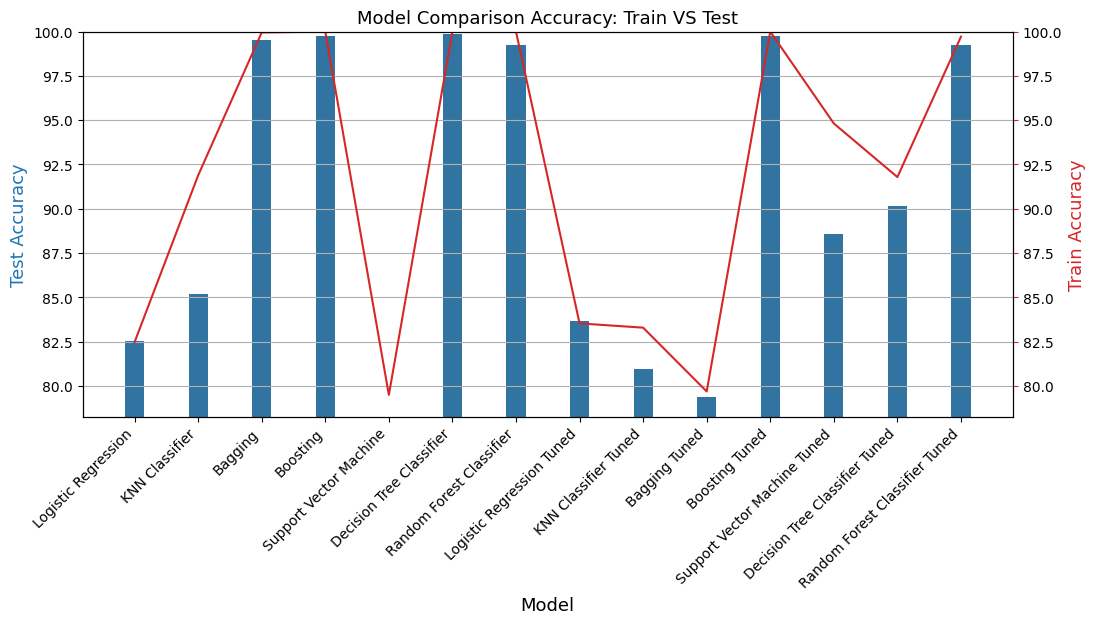

In [ ]:
fig, ax3 = plt.subplots(figsize=(12,5))
ax3.set_title('Model Comparison Accuracy: Train VS Test', fontsize=13)
color = 'tab:blue'
ax3.grid()
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('Test Accuracy', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='Test Accuracy', data = model_data, color= color, width= 0.3)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, horizontalalignment='right')
ax3.tick_params(axis='y')

ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Train Accuracy', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Train Accuracy', data = model_data, color=color, sort= False)
ax4.tick_params(axis='y', color=color)


y_min = min(model_data['Test Accuracy'].min(), model_data['Train Accuracy'].min())
y_max = max(model_data['Test Accuracy'].max(), model_data['Train Accuracy'].max())

ax3.set_ylim(y_min, y_max)
ax4.set_ylim(y_min, y_max)


plt.show()

The results between tuned models and non-tuned models are close, but in general the models that give us the best accurary are Boosting and Random Forest Classifier, while the regression models provide similar MSE results.

At the end, since we want to know how much the traffic is congestioned, our results provide that classification models are the best choice for this typology of task.  